In [2]:
%matplotlib inline
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import json
import os.path
from time import sleep
import matplotlib.pyplot as plt
import re
import string
import itertools


In [3]:
pd.set_option('display.max_columns', 999)

In [4]:
# your key to fun and profit
apiKey = '?api_key=9eebfa5d17a25b0439179a900fd7176f'

In [ ]:
# # get token from tmdb API
# requestTokenURL = 'https://api.themoviedb.org/3/authentication/token/new?api_key=9eebfa5d17a25b0439179a900fd7176f'
# tokenResp = requests.get(requestTokenURL)
# tokenJSON = tokenResp.json()
# token = tokenJSON['request_token']
# token

In [ ]:
# # append to response structure :
# # https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}&append_to_response=credits
# # test run at building a url to pass to API
# # details 
# a = 'https://api.themoviedb.org/3/movie/'
# b = '&append_to_response=credits'
# testID = '14171'
# testID2 = '8398'
# testID3 = '7457'
# buildURL = a + testID + apiKey 
# cURL = a + testID + apiKey + b
# buildURL, cURL

In [122]:
# sends an API request for a given ID #, saves file, and returns status code
# you only need this if you are actively pulling from the API
def getJSON(tmdbID):
    a = 'https://api.themoviedb.org/3/movie/'
    b = '&append_to_response=credits'
    ID = str(tmdbID)
    buildURL = a + ID + apiKey + b
    response = requests.get(buildURL)
    status = response.status_code
    with (open('json/{}.json'.format(tmdbID),'w')) as savefile:
        savefile.write(response.text)
#     return status
# activate above if you fucked everything up and need to pull everything down again

            
    

In [5]:
# run to initialize build functions
# looks if there is already a file in the directory, if so, it opens it,
# if not it calls the function to request one
def checkPathOpen(tmdbID):
    if os.path.isfile('json/{}.json'.format(tmdbID)) == False:
        getJSON(tmdbID)
        sleep(0.26)
    with (open('json/{}.json'.format(tmdbID),'r')) as infile:
        JSON = json.loads(infile.read())
        return JSON
    
    
def getbudget(tmdbID):
    JSON = checkPathOpen(tmdbID)
    return JSON['budget']


def getRevenue(tmdbID):
    JSON = checkPathOpen(tmdbID)
    return JSON['revenue']


def getROI(tmdbID):
    JSON = checkPathOpen(tmdbID)
    b = JSON['budget']
    r = JSON['revenue']
    if b != 0:
        return (r-b)/b

    
def getRelease(tmdbID):
    JSON = checkPathOpen(tmdbID)
    if JSON['release_date']:
        return JSON['release_date']


def getVoteScore(tmdbID):
    JSON = checkPathOpen(tmdbID)
    if JSON['vote_average']:
        return JSON['vote_average']


def getVoteCount(tmdbID):
    JSON = checkPathOpen(tmdbID)
    return JSON['vote_count']


def getSequel(tmdbID):
    JSON = checkPathOpen(tmdbID)
    if JSON['belongs_to_collection']:
        if JSON['belongs_to_collection'] == 'null':
            return np.nan
    
def getCrew(tmdbID):
    JSON = checkPathOpen(tmdbID)
    return JSON['credits']['crew']


def getCast(tmdbID):
    JSON = checkPathOpen(tmdbID)
    return JSON['credits']['cast']


def getGenres(tmdbID):
    JSON = checkPathOpen(tmdbID)
    li = JSON['genres']
    genreList = []
    for i in li:
        genreList.append(i['id'])
    return genreList


def getDirector(tmdbID):
    JSON = getCrew(tmdbID)
    cList = []
    for i in JSON:
        if i['job'] == 'Director':
            cList.append(i['name'])
    if len(cList) >= 1:
        return str(cList[0])
    else:
        return np.nan


def getDirectorID(tmdbID):
    JSON = getCrew(tmdbID)
    cList = []
    for i in JSON:
        if i['job'] == 'Director':
            cList.append(i['id'])
    if len(cList) >= 1:
        return str(cList[0])
    else:
        return np.nan

    
def getDirector2(tmdbID):
    JSON = getCrew(tmdbID)
    cList = []
    for i in JSON:
        if i['job'] == 'Director':
            cList.append(i['name'])
    if len(cList) > 1:
        return str(cList[1])
    else:
        return np.nan
    
    
def getDirector2ID(tmdbID):
    JSON = getCrew(tmdbID)
    cList = []
    for i in JSON:
        if i['job'] == 'Director':
            cList.append(i['id'])
    if len(cList) > 1:
        return str(cList[1])
    else:
        return np.nan
    
    
def getProducer1(tmdbID):
    JSON = getCrew(tmdbID)
    cList = []
    for i in JSON:
        if i['job'] == 'Producer':
            cList.append(i['name'])
    if len(cList) > 0:
        return str(cList[0])
    else:
        return np.nan

# add    
def getProducerID(tmdbID):
    JSON = getCrew(tmdbID)
    cList = []
    for i in JSON:
        if i['job'] == 'Producer':
            cList.append(i['id'])
    if len(cList) > 0:
        return str(cList[0])
    else:
        return np.nan    
    
    
    
def getProducer2(tmdbID):
    JSON = getCrew(tmdbID)
    cList = []
    for i in JSON:
        if i['job'] == 'Producer':
            cList.append(i['name'])
    if len(cList) > 1:
        return str(cList[1])
    else:
        return np.nan

# ADD    
def getProducer2ID(tmdbID):
    JSON = getCrew(tmdbID)
    cList = []
    for i in JSON:
        if i['job'] == 'Producer':
            cList.append(i['id'])
    if len(cList) > 1:
        return str(cList[1])
    else:
        return np.nan    

def getStudio(tmdbID):
    JSON = checkPathOpen(tmdbID)
    sList = []
    if JSON['production_companies']:
        s = JSON['production_companies']
        for i in s:
            l = i['name']
            sList.append(l)
        if len(sList)>0:
            return str(sList[0])
        else:
            return np.nan


def getRuntime(tmdbID):
    JSON = checkPathOpen(tmdbID)
    return JSON['runtime']


def getPopularity(tmdbID):
    JSON = checkPathOpen(tmdbID)
    return JSON['popularity']


def getCastList(tmdbID):
    JSON = getCast(tmdbID)
    castList = []
    for i in JSON:
        castList.append(int(i['id']))
    if len(castList)>3:
        cl = castList[:3]
        return cl
    else:
        cl = castList
        return cl


def getCrewList(tmdbID):
    d = getDirectorID(tmdbID)
    p = getProducerID(tmdbID)
    crewList = [d,p]
    return crewList


def getTitle(tmdbID):
    JSON = checkPathOpen(tmdbID)
    return JSON['title']

    

In [6]:
# movie lens data file
mov = pd.read_csv('movies.csv')
# mov = mov[mov['genres']!='Documentary']

# mov[mov['tmdbId']==192675]

In [7]:
mov['year']=mov['title'].map(lambda x: x.split('(')[-1].strip(')'))

In [8]:
import re 
mov['year'] = mov['year'].map(lambda x: re.sub('[^0-9]','',x))

In [9]:
mov['title'] = mov['title'].map(lambda x: x.split('(')[0])

In [10]:
# mov['genres'] = mov['genres'].map(lambda x: x.split('|'))

In [11]:
currentFilms = mov[mov['year']>='2007']

In [12]:
currentFilms = mov[mov['genres']!='(no genres listed)']

In [13]:
filtered = mov.loc[(mov.year>='2007')&(mov.genres!='(no genres listed)')&(mov.genres!='Documentary')]

In [14]:
filtered.set_index(keys='movieId',inplace=True)

In [15]:
idSet = pd.read_csv('links.csv', index_col='movieId')



In [16]:
mergedset = pd.merge(filtered,idSet,left_index=True,right_index=True,sort='year')
mergedset.dropna(subset=['tmdbId'],inplace=True)
# mergedset.to_csv('mergedSet.csv')

In [136]:
# # # this will scrape the API again-  don't run it


# pullset = mergedset[['title', 'tmdbId']]
# pullset['statusCode'] = mergedset['tmdbId'].map(lambda x: getJSON(x))
# pullset

In [ ]:
# just saving the extra scraping

# pullset.to_csv('statusCodes.csv')

# done, re-loading from csv

In [17]:
# run this to load the api pulled table 

# this is so that I can ignore anything with a 404 response
# so my table build code doesn't error out
movieDF =  pd.read_csv('statusCodes.csv',index_col='movieId')

In [18]:
# maps all the good pulls we got from tmdb
# run  this to re-build table
movieDF = movieDF[movieDF['statusCode']==200]
movieDF.head()

,title,tmdbId,statusCode
movieId,,,
49910,Freedom Writers,1646,200
50149,Happily N'Ever After,5393,200
50151,Home of the Brave,14171,200
50153,Code Name: The Cleaner,14396,200
50158,Stomp the Yard,1931,200


In [19]:
# RUN THIS IF YOU WANT TO RE BUILD THE TABLE FROM JSON!
movieDF['title'] = movieDF['tmdbId'].map(lambda x: getTitle(x))
movieDF['budget'] = movieDF['tmdbId'].map(lambda x: getbudget(x))
movieDF['revenue'] = movieDF['tmdbId'].map(lambda x: getRevenue(x))
movieDF['roi'] = movieDF['tmdbId'].map(lambda x: getROI(x))
movieDF['runtime'] = movieDF['tmdbId'].map(lambda x: getRuntime(x))
movieDF['release_date'] = movieDF['tmdbId'].map(lambda x: getRelease(x))
movieDF['voteScore'] = movieDF['tmdbId'].map(lambda x: getVoteScore(x))
movieDF['voteCount'] = movieDF['tmdbId'].map(lambda x: getVoteCount(x))
movieDF['popularity'] = movieDF['tmdbId'].map(lambda x: getPopularity(x))
movieDF['sequel'] = movieDF['tmdbId'].map(lambda x: getSequel(x))
movieDF['studio'] = movieDF['tmdbId'].map(lambda x: getStudio(x))
movieDF['crewList'] = movieDF['tmdbId'].map(lambda x: getCrewList(x))
movieDF['castList'] = movieDF['tmdbId'].map(lambda x: getCastList(x))
movieDF['genres'] = movieDF['tmdbId'].map(lambda x: getGenres(x))
movieDF.head()


,title,tmdbId,statusCode,budget,revenue,roi,runtime,release_date,voteScore,voteCount,popularity,sequel,studio,crewList,castList,genres
movieId,,,,,,,,,,,,,,,,
49910,Freedom Writers,1646,200,21000000,41170784,0.960514,123,2007-01-05,7.4,159,0.920962,None,Paramount Pictures,"[2163, 518]","[448, 18352, 349]","[80, 18]"
50149,Happily N'Ever After,5393,200,0,0,NaN,75,2006-09-14,4.5,45,0.581235,None,Vanguard Films,"[133293, 12107]","[15903, 43120, 11863]","[14, 16, 35, 878, 10751]"
50151,Home of the Brave,14171,200,12000000,0,-1.000000,106,2006-12-15,5.7,27,0.368664,None,North by Northwest Entertainment,"[11472, 18330]","[2231, 10860, 62644]","[28, 18]"
50153,Code Name: The Cleaner,14396,200,20000000,10337477,-0.483126,84,2007-01-05,4.9,45,0.377509,None,New Line Cinema,"[56911, nan]","[5726, 140, 37045]","[28, 35, 80]"
50158,Stomp the Yard,1931,200,13000000,75511123,4.808548,114,2007-05-16,6.0,49,0.409671,None,Rainforest Films,"[31119, 31121]","[31132, 22122, 31133]","[18, 10402]"


In [17]:
# just in case
# movieDF.to_csv('movieDF.csv')
movieDF.index =movieDF['tmdbId']
movieDF.count()

title           9578
tmdbId          9578
statusCode      9578
budget          9578
revenue         9578
roi             2962
runtime         9533
release_date    9573
voteScore       9025
voteCount       9578
popularity      9578
sequel             0
studio          7282
crewList        9578
castList        9578
genres          9578
dtype: int64

In [18]:
htmlData = pd.read_csv('scrapedHTMl.csv')

htmlData = htmlData.drop('Unnamed: 0',axis = 1)
htmlData.columns
htmlData.index = htmlData['tmdbId']


In [19]:
fullDF = pd.merge(left=movieDF, right=htmlData,left_index = True, right_index=True)


In [20]:
fullDF.columns

Index(['title_x', 'tmdbId_x', 'statusCode', 'budget', 'revenue', 'roi',
       'runtime', 'release_date', 'voteScore', 'voteCount', 'popularity',
       'sequel', 'studio', 'crewList', 'castList', 'genres', 'movieId',
       'title_y', 'tmdbId_y', 'flatTitle', 'status', 'gross', 'domesticGross',
       'foreignGross', 'prodBudget', 'worldGross'],
      dtype='object')

In [21]:
fullDF = fullDF.drop(['tmdbId_y', 'title_y', 'movieId', 'statusCode','statusCode','status','flatTitle'],axis=1)


In [22]:
fullDF.shape


(2041, 20)

In [23]:
fullDFtry3= pd.read_csv('try3.csv')
fullDFtry3.drop(['Unnamed: 0','Unnamed: 0.1','file','size','flatTitle','tail'], axis = 1, inplace = True)
fullDFtry3.head()

,movieId,title,tmdbId,domesticGross,prodBudget,foreignGross,worldGross
0,74486,$9.99,19311,52384,NaN,655970,708354
1,98230,10 Years,58547,203373,NaN,NaN,NaN
2,56093,12,20714,125120,NaN,7412333,7537453
3,81562,127 Hours,44115,18335230,1800000,42403567,60738797
4,70361,12 Rounds,17134,12234694,NaN,5045632,17280326


In [24]:
fullDFtry3.index = fullDFtry3['tmdbId']

In [25]:
try3 = pd.merge(left=movieDF, right=fullDFtry3,left_index = True, right_index=True)


In [26]:
try3.columns
try3.drop(['tmdbId_x', 'statusCode','title_y', 'tmdbId_y','movieId', ], axis = 1, inplace = True)

In [27]:
filt3 = try3.query('(revenue > 1000 or domesticGross>1000) and (budget>1000 or prodBudget>1000)')

In [28]:
# fucking finally
filt3.count()

title_x          1446
budget           1446
revenue          1446
roi              1348
runtime          1446
release_date     1446
voteScore        1443
voteCount        1446
popularity       1446
sequel              0
studio           1386
crewList         1446
castList         1446
genres           1446
domesticGross    1435
prodBudget        958
foreignGross     1203
worldGross       1199
dtype: int64

In [29]:

filt = fullDF.query('(revenue > 1000 or gross>1000) and (budget>1000 or prodBudget>1000)')
filt.head()


,title_x,tmdbId_x,budget,revenue,roi,runtime,release_date,voteScore,voteCount,popularity,sequel,studio,crewList,castList,genres,gross,domesticGross,foreignGross,prodBudget,worldGross
tmdbId,,,,,,,,,,,,,,,,,,,,
534,Terminator Salvation,534,200000000,371353001,0.856765,115,2009-05-20,5.8,1571,2.320211,None,Columbia Pictures,"[36425, 81142]","[3894, 65731, 21028]","[18, 28, 53, 878]",125322469,125322469,246030532,20000000,371353001
559,Spider-Man 3,559,258000000,890871626,2.452991,139,2007-05-01,5.8,1930,2.306168,None,Columbia Pictures,"[7623, 7626]","[2219, 205, 17051]","[14, 28, 12]",336530303,336530303,554341323,25800000,890871626
1248,Hannibal Rising,1248,50000000,82169884,0.643398,121,2007-02-06,6.0,396,0.323953,None,Ingenious Film Partners,"[16785, 16787]","[16790, 16789, 643]","[80, 18, 53]",27670986,27670986,54498898,NaN,82169884
1250,Ghost Rider,1250,110000000,228738393,1.079440,114,2007-02-16,5.2,892,1.826189,None,Columbia Pictures Corporation,"[16837, 7626]","[2963, 8170, 8210]","[53, 28, 14, 27]",115802596,115802596,112935797,11000000,228738393
1265,Bridge to Terabithia,1265,60000000,137587063,1.293118,96,2007-02-16,6.8,501,1.222746,None,Walden Media,"[36697, 54487]","[27972, 1285, 11664]","[12, 18, 10751]",82272442,82272442,55314621,NaN,137587063


In [30]:
# helper functions to derrive values
def compareDrop(budget1,budget2):
    obj = pd.Series([budget1,budget2])
    pd.Series.dropna(obj)
    if len(obj) >1:
        return (max(obj)+min(obj))//2
    else:
        return int(obj)
    
def worldG(rev, domG, forG):
    obj1 = pd.Series([rev, domG])
    obj1 = pd.Series.dropna(obj1)
    if len(obj1) == 0:
        return np.nan
    else:
        if len(obj1)>1:
            dom = (max(obj1)+min(obj1))//2
        else:
            dom = int(obj1)
        if np.isnan(forG):
            return np.nan
        else:
            return int(forG)+int(dom)
    
def calcROI(bud, rev):
    b = bud
    r = rev
    if b != 0:
        return (r-b)/b
    
def combo(listA,listB):
    return list(itertools.product(listA,listB))

def collabs(a):
    return list(itertools.combinations(sorted(a),2))
    


In [31]:
# cleaning up and derriving values
filt3['ActualBudget'] = filt3.apply(lambda row: compareDrop(row['budget'], row['prodBudget']), axis=1)
filt3['ActualRevenue'] = filt3.apply(lambda row: compareDrop(row['revenue'], row['domesticGross']), axis=1)
filt3['ActualROI'] = filt3.apply(lambda row: calcROI(row['ActualBudget'], row['ActualRevenue']), axis=1)
filt3.shape

/Users/kylemix/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/kylemix/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/kylemix/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

(1446, 21)

In [32]:
filt3.columns


Index(['title_x', 'budget', 'revenue', 'roi', 'runtime', 'release_date',
       'voteScore', 'voteCount', 'popularity', 'sequel', 'studio', 'crewList',
       'castList', 'genres', 'domesticGross', 'prodBudget', 'foreignGross',
       'worldGross', 'ActualBudget', 'ActualRevenue', 'ActualROI'],
      dtype='object')

In [33]:
filt3['derworldRev'] = filt3.apply(lambda row: worldG(row['revenue'], row['domesticGross'],row['foreignGross']), axis=1)

/Users/kylemix/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
filt3.count()

title_x          1446
budget           1446
revenue          1446
roi              1348
runtime          1446
release_date     1446
voteScore        1443
voteCount        1446
popularity       1446
sequel              0
studio           1386
crewList         1446
castList         1446
genres           1446
domesticGross    1435
prodBudget        958
foreignGross     1203
worldGross       1199
ActualBudget     1446
ActualRevenue    1446
ActualROI        1446
derworldRev      1203
dtype: int64

In [35]:
filt['ActualBudget'] = filt.apply(lambda row: compareDrop(row['budget'], row['prodBudget']), axis=1)
filt['ActualRevenue'] = filt.apply(lambda row: compareDrop(row['revenue'], row['domesticGross']), axis=1)
filt['ActualROI'] = filt.apply(lambda row: calcROI(row['ActualBudget'], row['ActualRevenue']), axis=1)

/Users/kylemix/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/kylemix/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/kylemix/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [66]:
# seems clear we need some more data for the 8000 movies with bad financial info.  
# TO THE SOUP!
t = movieDF[['title','tmdbId']]
regex = re.compile('[%s]' % re.escape(string.punctuation))
def flattenString(s):
    t = regex.sub('',s)
    t = t.lower()
    t = t.strip()
    t = t.split()
    t= ''.join(t)
    return  t+'.htm'
t['flatTitle'] = t['title'].map(lambda x: flattenString(x))
t.head()
# t.to_csv('mojoScrape.csv')


/Users/kylemix/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,title,tmdbId,flatTitle
tmdbId,,,
1646,Freedom Writers,1646,freedomwriters.htm
5393,Happily N'Ever After,5393,happilyneverafter.htm
14171,Home of the Brave,14171,homeofthebrave.htm
14396,Code Name: The Cleaner,14396,codenamethecleaner.htm
1931,Stomp the Yard,1931,stomptheyard.htm


In [38]:

# takes the cast list and turns it into list of two value tuples representing the collaboration of 
# all actors in a movie
from itertools import combinations

pairTest = movieDF[['tmdbId','castList']]
def collab(pairList):
    p = combinations(sorted(pairList),2)
    l2 = []
    for i in p:
        l2.append(i)
    return l2
pairTest['collabs'] = pairTest['castList'].map(lambda x: collab(x))
pairTest.head()



/Users/kylemix/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,tmdbId,castList,collabs
tmdbId,,,
1646,1646,"[448, 18352, 349]","[(349, 448), (349, 18352), (448, 18352)]"
5393,5393,"[15903, 43120, 11863]","[(11863, 15903), (11863, 43120), (15903, 43120)]"
14171,14171,"[2231, 10860, 62644]","[(2231, 10860), (2231, 62644), (10860, 62644)]"
14396,14396,"[5726, 140, 37045]","[(140, 5726), (140, 37045), (5726, 37045)]"
1931,1931,"[31132, 22122, 31133]","[(22122, 31132), (22122, 31133), (31132, 31133)]"


In [39]:
collabDF = pd.DataFrame()
collabDF['tmdbId'] = movieDF['tmdbId']
collabDF['castList']=movieDF['castList']
collabDF['crewList']=movieDF['crewList']
collabDF['genres'] =movieDF ['genres']


In [40]:
collabDF['castToCrew']=collabDF.apply(lambda row: combo(row['crewList'],row['castList']),axis=1)
collabDF['castToGenre']=collabDF.apply(lambda row: combo(row['castList'],row['genres']),axis=1)
collabDF['crewToGenre']=collabDF.apply(lambda row: combo(row['crewList'],row['genres']),axis=1)
collabDF['castToCast']=collabDF.castList.map(lambda x: collabs(x))


In [41]:
collabDF.head()

,tmdbId,castList,crewList,genres,castToCrew,castToGenre,crewToGenre,castToCast
tmdbId,,,,,,,,
1646,1646,"[448, 18352, 349]","[2163, 518]","[80, 18]","[(2163, 448), (2163, 18352), (2163, 349), (518...","[(448, 80), (448, 18), (18352, 80), (18352, 18...","[(2163, 80), (2163, 18), (518, 80), (518, 18)]","[(349, 448), (349, 18352), (448, 18352)]"
5393,5393,"[15903, 43120, 11863]","[133293, 12107]","[14, 16, 35, 878, 10751]","[(133293, 15903), (133293, 43120), (133293, 11...","[(15903, 14), (15903, 16), (15903, 35), (15903...","[(133293, 14), (133293, 16), (133293, 35), (13...","[(11863, 15903), (11863, 43120), (15903, 43120)]"
14171,14171,"[2231, 10860, 62644]","[11472, 18330]","[28, 18]","[(11472, 2231), (11472, 10860), (11472, 62644)...","[(2231, 28), (2231, 18), (10860, 28), (10860, ...","[(11472, 28), (11472, 18), (18330, 28), (18330...","[(2231, 10860), (2231, 62644), (10860, 62644)]"
14396,14396,"[5726, 140, 37045]","[56911, nan]","[28, 35, 80]","[(56911, 5726), (56911, 140), (56911, 37045), ...","[(5726, 28), (5726, 35), (5726, 80), (140, 28)...","[(56911, 28), (56911, 35), (56911, 80), (nan, ...","[(140, 5726), (140, 37045), (5726, 37045)]"
1931,1931,"[31132, 22122, 31133]","[31119, 31121]","[18, 10402]","[(31119, 31132), (31119, 22122), (31119, 31133...","[(31132, 18), (31132, 10402), (22122, 18), (22...","[(31119, 18), (31119, 10402), (31121, 18), (31...","[(22122, 31132), (22122, 31133), (31132, 31133)]"


In [552]:
# creates new table that displays each unique collaboration pair for each tmdbId
actorCollabs = pairTest[['tmdbId','collabs']]
actorCollabs.index = actorCollabs['tmdbId']
actorCollabs = actorCollabs['collabs'].apply(pd.Series)
actorCollabs = actorCollabs.rename(columns = lambda x: 'collab_'+str(x))
actCollabsInline = actorCollabs.stack()
actCollabs = actCollabsInline.reset_index()
actCollabs.columns = ['tmdbId', 'level_1', 'collabs']
actCollabs.drop(['level_1'], inplace=True,axis=1)
actCollabs.head()
# counts instances of collaboration pairs as 2 tuple
# cnt = actCollabs.groupby(['collabs']).count()
# # cnt.sort_values('tmdbId', ascending = False)
# cnt

# Pairwise collaborations for each actor in project

,tmdbId,collabs
0,1646,"(349, 448)"
1,1646,"(349, 11356)"
2,1646,"(349, 18352)"
3,1646,"(349, 18353)"
4,1646,"(448, 11356)"


In [553]:
# just in case, saving to csv

# actCollabs.to_csv('actCollabs.csv')

In [102]:

actors = movieDF[['tmdbId','castList']]
actors.index = actors['tmdbId']
actors = actors['castList'].apply(pd.Series)
actors = actors.rename(columns= lambda x: 'actor_' + str(x))
actors = actors.stack()
actors = actors.reset_index()
actors.columns = ['tmdbId', 'level_1','actorId']
actors.drop('level_1',axis=1,inplace=True)
# list of unique actors-  likely use for collaboration matrix
# can't save to csv, so you need to re-run this
a =actors['actorId'].unique

# actors.head()

# a.to_csv('uniqueActors.csv')

In [259]:
crew = movieDF[['tmdbId','crewList']]
crew.index = crew['tmdbId']
crew = crew['crewList'].apply(pd.Series)
crew = crew.rename(columns= lambda x: 'crew_' + str(x))
crew = crew.stack()
crew = crew.reset_index()
crew.columns = ['tmdbId', 'level_1','crewID']
crew.drop('level_1',axis=1,inplace=True)
# list of unique actors-  likely use for collaboration matrix
# can't save to csv, so you need to re-run this
# a =crew['crewID'].unique
crewprojectCount = crew.groupby('crewID').count()
crewprojectCount.sort_values('tmdbId',inplace=True,ascending=False)
crewprojectCount.columns = [ 'projectCount']
crewprojectCount.head()
crewprojectCount.shape

(9092, 1)

In [258]:
# count of unique movies actor has appeared in
projectCount = actors.groupby('actorId').count()
projectCount.sort_values('tmdbId',inplace=True,ascending=False)
projectCount.columns = [ 'projectCount']
projectCount.shape

(14109, 1)

In [122]:
experience = pd.concat([crewprojectCount,projectCount], axis= 0 ).reset_index()


In [132]:
experience.columns=['personId', 'projectCount']

In [280]:
x = experience.loc[experience['personId'] == 100]
x['projectCount']

9450    9
Name: projectCount, dtype: int64

In [322]:
experience['personId'] = experience.personId.astype('int')

In [36]:
# list of movies with useable financial data:  useable columns ActualBudget ActualRevenue ActualROI derworldRev

modelDF = filt3.copy(deep=True)

In [120]:
# list of collaborations between 3 actors 1 director, 1 producer, and any genre tags
collabDF.head()

,tmdbId,castList,crewList,genres,castToCrew,castToGenre,crewToGenre,castToCast
tmdbId,,,,,,,,
1646,1646,"[448, 18352, 349]","[2163, 518]","[80, 18]","[(2163, 448), (2163, 18352), (2163, 349), (518...","[(448, 80), (448, 18), (18352, 80), (18352, 18...","[(2163, 80), (2163, 18), (518, 80), (518, 18)]","[(349, 448), (349, 18352), (448, 18352)]"
5393,5393,"[15903, 43120, 11863]","[133293, 12107]","[14, 16, 35, 878, 10751]","[(133293, 15903), (133293, 43120), (133293, 11...","[(15903, 14), (15903, 16), (15903, 35), (15903...","[(133293, 14), (133293, 16), (133293, 35), (13...","[(11863, 15903), (11863, 43120), (15903, 43120)]"
14171,14171,"[2231, 10860, 62644]","[11472, 18330]","[28, 18]","[(11472, 2231), (11472, 10860), (11472, 62644)...","[(2231, 28), (2231, 18), (10860, 28), (10860, ...","[(11472, 28), (11472, 18), (18330, 28), (18330...","[(2231, 10860), (2231, 62644), (10860, 62644)]"
14396,14396,"[5726, 140, 37045]","[56911, nan]","[28, 35, 80]","[(56911, 5726), (56911, 140), (56911, 37045), ...","[(5726, 28), (5726, 35), (5726, 80), (140, 28)...","[(56911, 28), (56911, 35), (56911, 80), (nan, ...","[(140, 5726), (140, 37045), (5726, 37045)]"
1931,1931,"[31132, 22122, 31133]","[31119, 31121]","[18, 10402]","[(31119, 31132), (31119, 22122), (31119, 31133...","[(31132, 18), (31132, 10402), (22122, 18), (22...","[(31119, 18), (31119, 10402), (31121, 18), (31...","[(22122, 31132), (22122, 31133), (31132, 31133)]"


In [229]:
# next steps,  get a base model going with this data,  you'll need to map it back to peoples names and genre names
# youll need to pull that still.  consider adding popularity as a feature-  it's there for movies,  but it exists for cast+crew


In [37]:
modelDF.head()

,title_x,budget,revenue,roi,runtime,release_date,voteScore,voteCount,popularity,sequel,studio,crewList,castList,genres,domesticGross,prodBudget,foreignGross,worldGross,ActualBudget,ActualRevenue,ActualROI,derworldRev
tmdbId,,,,,,,,,,,,,,,,,,,,,,
35,The Simpsons Movie,75000000,527068851,6.027585,87,2007-07-25,6.9,1129,1.144934,None,Gracie Films,"[197, 3388]","[198, 199, 200]","[16, 35, 10751]",183135014,7500000,343936008,527071022,41250000,355101932,7.608532,699037940
155,The Dark Knight,185000000,1001921825,4.415794,152,2008-07-16,8.1,7907,4.145542,None,DC Comics,"[525, 525]","[3894, 3895, 1810]","[18, 28, 80, 53]",533345358,18500000,469700000,1003045358,101750000,767633591,6.544310,1237333591
217,Indiana Jones and the Kingdom of the Crystal S...,185000000,786636033,3.252087,122,2008-05-21,5.6,1410,1.510550,None,Lucasfilm,"[488, 664]","[3, 112, 10959]","[12, 28]",317101119,18500000,469534914,786636033,101750000,551868576,4.423770,1021403490
285,Pirates of the Caribbean: At World's End,300000000,961000000,2.203333,169,2007-05-19,6.7,2419,2.504935,None,Walt Disney Pictures,"[1704, 770]","[85, 114, 116]","[12, 14, 28]",309420425,30000000,654000000,963420425,165000000,635210212,2.849759,1289210212
298,Ocean's Thirteen,85000000,311312624,2.662501,122,2007-06-07,6.4,1279,1.781123,None,Village Roadshow Pictures,"[1884, 1888]","[1461, 287, 1892]","[80, 53]",117154724,NaN,194157900,311312624,85000000,214233674,1.520396,408391574


In [38]:
modelDF['Glength'] = modelDF['genres'].map(lambda x: len(x))

In [39]:
def limitGenres(genreList):
    if len(genreList)>=3:
        return genreList[0],genreList[1],genreList[2]
    elif len(genreList)==2:
        return genreList[0],genreList[1],np.nan
    elif len(genreList)==1:
        return genreList[0],np.nan,np.nan
    else:
        return np.nan

def genre1(genres):
    if len(genres)>0:
        if not np.isnan(float(genres[0])):
            return int(genres[0])
        else:
            return np.nan
    
def genre2(genres):
    if len(genres)>=2:
        if not np.isnan(float(genres[1])):
            return int(genres[1])
        else:
            return np.nan
    else:
        return np.nan

def genre3(genres):
    if len(genres)>=3:
        if not np.isnan(float(genres[2])):
            return int(genres[2])
        else:
            return np.nan
    else:
        return np.nan


In [40]:
modelDF['genre1'] = modelDF['genres'].map(lambda x: genre1(x))
modelDF['genre2'] = modelDF['genres'].map(lambda x: genre2(x))
modelDF['genre3'] = modelDF['genres'].map(lambda x: genre3(x))


In [41]:
modelDF.columns


Index(['title_x', 'budget', 'revenue', 'roi', 'runtime', 'release_date',
       'voteScore', 'voteCount', 'popularity', 'sequel', 'studio', 'crewList',
       'castList', 'genres', 'domesticGross', 'prodBudget', 'foreignGross',
       'worldGross', 'ActualBudget', 'ActualRevenue', 'ActualROI',
       'derworldRev', 'Glength', 'genre1', 'genre2', 'genre3'],
      dtype='object')

In [42]:
modelDF = modelDF.drop(['revenue','Glength','budget','roi','sequel','prodBudget','domesticGross','foreignGross','worldGross'], axis=1)

In [148]:
modelDF.tail(50)

,title_x,runtime,release_date,voteScore,voteCount,popularity,studio,crewList,castList,genres,ActualBudget,ActualRevenue,ActualROI,derworldRev,genre1,genre2,genre3,director,producer,actor1,actor2,actor3
tmdbId,,,,,,,,,,,,,,,,,,,,,,
273248,The Hateful Eight,167,2015-12-25,7.3,2070,3.427014,Double Feature Films,"[138, 12997]","[2231, 6856, 10431]","[80, 18, 9648, 37]",24200000,104938766,3.336313,206581467,80,18,9648,138,12997,2231,6856,10431
273481,Sicario,121,2015-09-11,7.1,1304,2.692386,Lionsgate,"[137427, 67759]","[5081, 1121, 16851]","[28, 80, 18, 9648, 53]",16500000,65457554,2.967124,103440705,28,80,18,137427,67759,5081,1121,16851
273895,Selma,127,2014-12-25,7.4,524,0.710490,Plan B Entertainment,"[929825, 57583]","[35013, 207, 37158]","[36, 18]",11000000,59432408,4.402946,74143408,36,18,NaN,929825,57583,35013,207,37158
273922,Deadline,83,2013-05-16,6.0,1,0.003789,Tasara Films,"[1384678, nan]","[60292, 1261381, 91607]","[53, 9648]",500000,70605,-0.858790,NaN,53,9648,NaN,1384678,NaN,60292,1261381,91607
274854,The Last Witch Hunter,106,2015-10-21,5.5,769,2.467087,Summit Entertainment,"[52609, 65377]","[12835, 1223793, 3895]","[14, 28, 12]",49500000,83882155,0.694589,196911145,14,28,12,52609,65377,12835,1223793,3895
275601,Ricki and the Flash,100,2015-07-10,5.5,140,0.990392,Columbia TriStar,"[16294, 52446]","[5064, 8945, 47281]","[35, 18, 10402]",9900000,34073736,2.441792,48576920,35,18,10402,16294,52446,5064,8945,47281
277432,Happy New Year,180,2014-10-23,5.9,47,0.306150,Yash Raj Films,"[8311, 53973]","[35742, 53975, 35793]","[28, 35, 80]",25000000,20616,-0.999175,NaN,28,35,80,8311,53973,35742,53975,35793
277685,Unfriended,82,2015-04-17,5.6,593,1.395218,Bazelevs Production,"[86688, 23430]","[444211, 1385058, 155621]","[27, 53]",1000000,47682090,46.682090,79256643,27,53,NaN,86688,23430,444211,1385058,155621
279914,The Identical,107,2014-09-05,5.0,10,0.318732,City of Peace Films,"[1355726, 44065]","[15852, 11477, 58370]","[10402, 18]",12000000,1413833,-0.882181,NaN,10402,18,NaN,1355726,44065,15852,11477,58370


In [43]:
modelDF['director'] = modelDF.crewList.map(lambda x: genre1(x))

In [44]:
modelDF['producer'] = modelDF.crewList.map(lambda x: genre2(x))

In [45]:
modelDF['actor1'] =  modelDF.castList.map(lambda x: genre1(x))

In [46]:
modelDF['actor2'] = modelDF.castList.map(lambda x: genre2(x))

In [47]:
modelDF['actor3'] = modelDF.castList.map(lambda x: genre3(x))

In [48]:
modelDF['release_date'] = pd.to_datetime(modelDF['release_date'], format='%Y-%m-%d')

In [116]:
modelDF['actor1Exp'] = 

,title_x,runtime,release_date,voteScore,voteCount,popularity,studio,crewList,castList,genres,ActualBudget,ActualRevenue,ActualROI,derworldRev,genre1,genre2,genre3,director,producer,actor1,actor2,actor3,genre1Cat
tmdbId,,,,,,,,,,,,,,,,,,,,,,,
35,The Simpsons Movie,87,2007-07-25,6.9,1129,1.144934,Gracie Films,"[197, 3388]","[198, 199, 200]","[16, 35, 10751]",41250000,355101932,7.608532,699037940,16,35,10751,197,3388,198,199,200,16
155,The Dark Knight,152,2008-07-16,8.1,7907,4.145542,DC Comics,"[525, 525]","[3894, 3895, 1810]","[18, 28, 80, 53]",101750000,767633591,6.544310,1237333591,18,28,80,525,525,3894,3895,1810,18
217,Indiana Jones and the Kingdom of the Crystal S...,122,2008-05-21,5.6,1410,1.510550,Lucasfilm,"[488, 664]","[3, 112, 10959]","[12, 28]",101750000,551868576,4.423770,1021403490,12,28,NaN,488,664,3,112,10959,12
285,Pirates of the Caribbean: At World's End,169,2007-05-19,6.7,2419,2.504935,Walt Disney Pictures,"[1704, 770]","[85, 114, 116]","[12, 14, 28]",165000000,635210212,2.849759,1289210212,12,14,28,1704,770,85,114,116,12
298,Ocean's Thirteen,122,2007-06-07,6.4,1279,1.781123,Village Roadshow Pictures,"[1884, 1888]","[1461, 287, 1892]","[80, 53]",85000000,214233674,1.520396,408391574,80,53,NaN,1884,1888,1461,287,1892,80


In [144]:
modelDF = modelDF.drop(modelDF['ActualROI'].idxmax())

In [94]:
genredict =  {
      28: "Action",
      12: "Adventure",
      16: "Animation",
      35: "Comedy",
      80: "Crime",
      99: "Documentary",
      18: "Drama",
      10751: "Family",
      14: "Fantasy",
      36: "History",
      27: "Horror",
      10402: "Music",
      9648: "Mystery",
      10749: "Romance",
      878: "Science Fiction",
      10770: "TV Movie",
      53: "Thriller",
      10752: "War",
      37: "Western",
    }

In [65]:
# modelDF = pd.merge(left=modelDF, right = experience)

In [145]:
def genreROI(genre):
    for i in modelDF.director.unique:
        roi = []
        if modelDF.director == i:
            roi.append(modelDF.ActualROI.loc[i])
            return mean(roi)

In [146]:

dirMeanROI = modelDF.groupby(['director'])['ActualROI'].mean().reset_index()
dirMeanROI.columns = [['director', 'DirMeanROI']]
dirMeanROI.head()

,director,DirMeanROI
0,8,5.718985
1,10,4.321283
2,24,3.205739
3,31,1.174807
4,39,2.570950


In [147]:
modelDF.shape

(1444, 23)

In [148]:
test = pd.merge(left=modelDF, right=dirMeanROI,on='director',how='left')


In [149]:
test.head()

,title_x,runtime,release_date,voteScore,voteCount,popularity,studio,crewList,castList,genres,ActualBudget,ActualRevenue,ActualROI,derworldRev,genre1,genre2,genre3,director,producer,actor1,actor2,actor3,genre1Cat,DirMeanROI
0,The Simpsons Movie,87,2007-07-25,6.9,1129,1.144934,Gracie Films,"[197, 3388]","[198, 199, 200]","[16, 35, 10751]",41250000,355101932,7.608532,699037940,16,35,10751,197,3388,198,199,200,16,7.608532
1,The Dark Knight,152,2008-07-16,8.1,7907,4.145542,DC Comics,"[525, 525]","[3894, 3895, 1810]","[18, 28, 80, 53]",101750000,767633591,6.544310,1237333591,18,28,80,525,525,3894,3895,1810,18,4.979807
2,Indiana Jones and the Kingdom of the Crystal S...,122,2008-05-21,5.6,1410,1.510550,Lucasfilm,"[488, 664]","[3, 112, 10959]","[12, 28]",101750000,551868576,4.423770,1021403490,12,28,NaN,488,664,3,112,10959,12,3.274444
3,Pirates of the Caribbean: At World's End,169,2007-05-19,6.7,2419,2.504935,Walt Disney Pictures,"[1704, 770]","[85, 114, 116]","[12, 14, 28]",165000000,635210212,2.849759,1289210212,12,14,28,1704,770,85,114,116,12,1.327290
4,Ocean's Thirteen,122,2007-06-07,6.4,1279,1.781123,Village Roadshow Pictures,"[1884, 1888]","[1461, 287, 1892]","[80, 53]",85000000,214233674,1.520396,408391574,80,53,NaN,1884,1888,1461,287,1892,80,7.172342


In [364]:
g1Mean = modelDF.groupby(['genre1'])['ActualROI'].mean().reset_index()
g1Mean.columns = [['genre1', 'genreMeanROI']]
g1Mean.head()

,genre1,genreMeanROI
0,12,2.064886
1,14,4.039890
2,16,3.258136
3,18,2.811082
4,27,7.776481


In [365]:
g2Mean = modelDF.groupby(['genre2'])['ActualROI'].mean().reset_index()
g2Mean.columns = [['genre2', 'genre2MeanROI']]


In [366]:
g3Mean = modelDF.groupby(['genre3'])['ActualROI'].mean().reset_index()
g3Mean.columns = [['genre3', 'genre3MeanROI']]

In [367]:
ac1MeanROI = modelDF.groupby(['actor1'])['ActualROI'].mean().reset_index()
ac1MeanROI.columns = [['actor1', 'act1MeanROI']]

In [368]:
ac2MeanROI = modelDF.groupby(['actor2'])['ActualROI'].mean().reset_index()
ac2MeanROI.columns = [['actor2', 'act2MeanROI']]

In [369]:
ac3MeanROI = modelDF.groupby(['actor3'])['ActualROI'].mean().reset_index()
ac3MeanROI.columns = [['actor3', 'act3MeanROI']]

In [370]:
test1 = pd.merge(left=test, right=g1Mean ,on='genre1',how='left')
test2 = pd.merge(left=test1, right=g2Mean ,on='genre2',how='left')
test3 = pd.merge(left=test2, right=g3Mean ,on='genre3',how='left')
test4 = pd.merge(left=test3, right=ac1MeanROI ,on='actor1',how='left')
test5 = pd.merge(left=test4, right=ac2MeanROI ,on='actor2',how='left')
test6 = pd.merge(left=test5, right=ac3MeanROI ,on='actor3',how='left')




In [371]:
test6['actorsMeanROI'] = test6[['act1MeanROI', 'act2MeanROI', 'act3MeanROI']].mean(axis=1) 

In [88]:
# test6 = test6.drop(['genre2','genre3','producer','actor2','actor3','genre1Cat','genre2MeanROI','genre3MeanROI','act2MeanROI','act3MeanROI','crewList','castList','genres'], axis = 1)

In [92]:

# test6=test6.drop(['studio'],axis=1)

In [318]:
experience.personId.values

array(['59', '30053', '84348', ..., '105656', '105668', '1686907'], dtype=object)

In [323]:
experence_map = experience[["personId", "projectCount"]].set_index('personId').to_dict(orient='index')

In [317]:
from itertools import islice

list(islice(experence_map.items(), 0, 2))

[(1441792.0, {'projectCount': 1}), ('10855', {'projectCount': 1})]

In [333]:
def getExp(perID):
    result = np.nan
    if not np.isnan(perID):
        perID = int(perID)
        if perID in experence_map:
            result = experence_map[perID]["projectCount"]
    return result
#     x = experience.loc[experience['personId'] == str(perID)]
#     y= list(x.projectCount)
#     if np.isnan(x['projectCount'].values):
#         return np.nan
    
#     elif len(y)>=1:
#         return int(y[0])
#     else:
#         return np.nan
    
    
getExp(2236)

20

In [271]:
experence_map.get(200)

{'projectCount': 1}

In [372]:
test6['year'] = test6['release_date'].dt.year 
test6['month'] =test6['release_date'].dt.month


In [373]:
test6['dirExp'] = test6.director.map(getExp)
test6['actor1exp'] = test6.actor1.map(getExp)
test6['actor2exp'] = test6.actor2.map(getExp)
test6['actor3exp'] = test6.actor3.map(getExp)
test6['producer'] = test6.producer.map(getExp)
test6['actorsExp'] = test6['actor3exp']+ test6['actor2exp']+ test6['actor1exp']
test6['crewsExp'] = test6['dirExp'] + test6['actorsExp']
test6['meanGenreROI'] = test6[['genreMeanROI','genre2MeanROI','genre3MeanROI']].mean(axis = 1)

In [376]:
test6 = test6.drop(['genre1Cat','genres','castList','crewList'],axis=1)

In [377]:
test6.head()

,title_x,runtime,release_date,voteScore,voteCount,popularity,studio,ActualBudget,ActualRevenue,ActualROI,derworldRev,genre1,genre2,genre3,director,producer,actor1,actor2,actor3,DirMeanROI,genreMeanROI,genre2MeanROI,genre3MeanROI,act1MeanROI,act2MeanROI,act3MeanROI,actorsMeanROI,year,month,dirExp,actor1exp,actor2exp,actor3exp,actorsExp,crewsExp,meanGenreROI
0,The Simpsons Movie,87,2007-07-25,6.9,1129,1.144934,Gracie Films,41250000,355101932,7.608532,699037940,16,35,10751,197,3,198,199,200,7.608532,3.258136,2.872122,4.807178,7.608532,7.608532,7.608532,7.608532,2007,7,2,1,1,1,3,5,3.645812
1,The Dark Knight,152,2008-07-16,8.1,7907,4.145542,DC Comics,101750000,767633591,6.544310,1237333591,18,28,80,525,8,3894,3895,1810,4.979807,2.811082,1.774309,2.070272,3.840877,5.552483,6.544310,5.312557,2008,7,8,12,11,3,26,34,2.218555
2,Indiana Jones and the Kingdom of the Crystal S...,122,2008-05-21,5.6,1410,1.510550,Lucasfilm,101750000,551868576,4.423770,1021403490,12,28,NaN,488,4,3,112,10959,3.274444,2.064886,1.774309,NaN,1.083787,2.446860,4.423770,2.651472,2008,5,6,10,12,15,37,43,1.919598
3,Pirates of the Caribbean: At World's End,169,2007-05-19,6.7,2419,2.504935,Walt Disney Pictures,165000000,635210212,2.849759,1289210212,12,14,28,1704,6,85,114,116,1.327290,2.064886,2.497857,1.841681,1.108174,0.924943,1.285179,1.106099,2007,5,3,14,7,15,36,39,2.134808
4,Ocean's Thirteen,122,2007-06-07,6.4,1279,1.781123,Village Roadshow Pictures,85000000,214233674,1.520396,408391574,80,53,NaN,1884,2,1461,287,1892,7.172342,3.322223,3.458723,NaN,3.160651,1.868611,5.326226,3.451829,2007,6,1,15,11,16,42,43,3.390473


In [380]:
FirstModelDF = test6[['ActualBudget','ActualRevenue','genre1','runtime','DirMeanROI','meanGenreROI','genre3MeanROI','actorsMeanROI','year','month','dirExp','producer','actor1exp','actor2exp','actor3exp','actorsExp','crewsExp','ActualROI']]

In [381]:
FirstModelDF.head()


,ActualBudget,ActualRevenue,genre1,runtime,DirMeanROI,meanGenreROI,genre3MeanROI,actorsMeanROI,year,month,dirExp,producer,actor1exp,actor2exp,actor3exp,actorsExp,crewsExp,ActualROI
0,41250000,355101932,16,87,7.608532,3.645812,4.807178,7.608532,2007,7,2,3,1,1,1,3,5,7.608532
1,101750000,767633591,18,152,4.979807,2.218555,2.070272,5.312557,2008,7,8,8,12,11,3,26,34,6.544310
2,101750000,551868576,12,122,3.274444,1.919598,NaN,2.651472,2008,5,6,4,10,12,15,37,43,4.423770
3,165000000,635210212,12,169,1.327290,2.134808,1.841681,1.106099,2007,5,3,6,14,7,15,36,39,2.849759
4,85000000,214233674,80,122,7.172342,3.390473,NaN,3.451829,2007,6,1,2,15,11,16,42,43,1.520396


In [287]:
FirstModelDF = test6[['ActualBudget','ActualRevenue','runtime','DirMeanROI','genreMeanROI','genre2MeanROI','genre3MeanROI','act1MeanROI','ActualROI']]

In [386]:
FirstModelDF.to_csv('modelMe.csv')

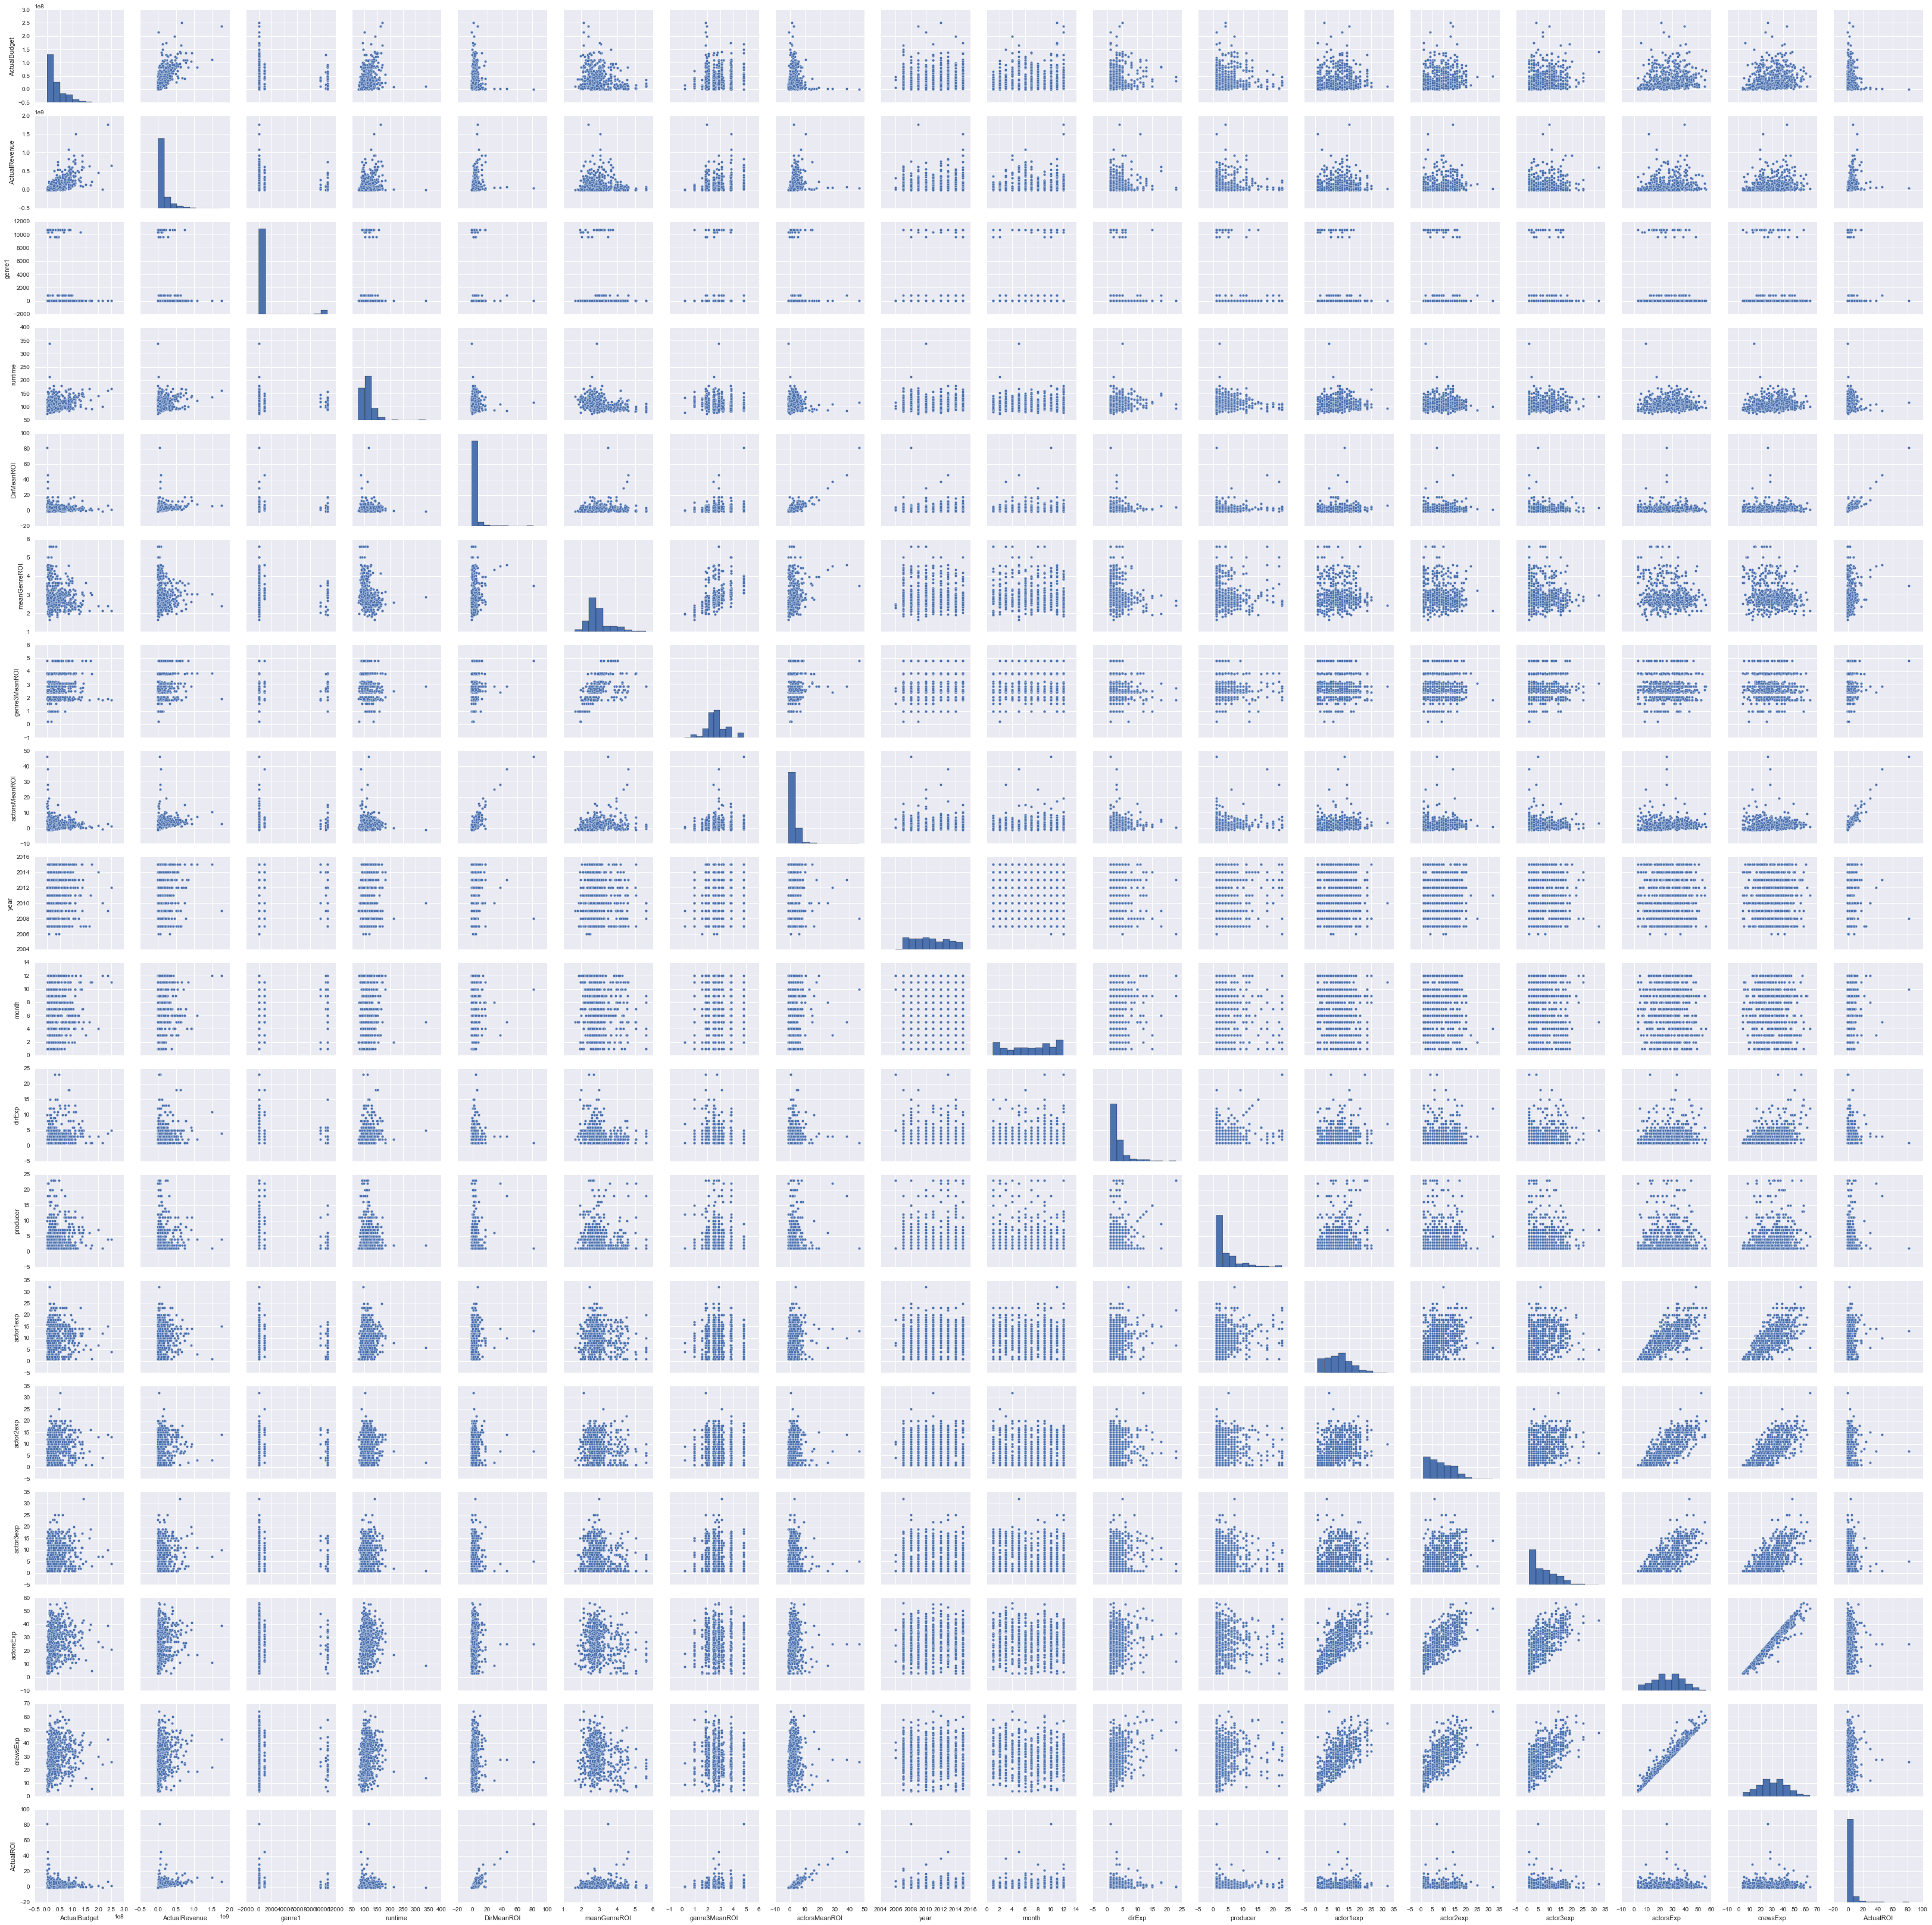

In [385]:
sns.pairplot(FirstModelDF.dropna())

In [384]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels as sm
import patsy

/Users/kylemix/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [276]:
lml = smf.ols('ActualROI ~ ActualBudget + ActualRevenue + runtime + DirMeanROI + genreMeanROI + genre2MeanROI + genre3MeanROI + act1MeanROI',data = FirstModelDF)
fitl = lml.fit()
fitl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ActualROI   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     208.2
Date:                Tue, 04 Oct 2016   Prob (F-statistic):          9.63e-180
Time:                        18:15:51   Log-Likelihood:                -1916.5
No. Observations:                 712   AIC:                             3851.
Df Residuals:                     703   BIC:                             3892.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        -1.1830      0.968     -1.223      0.222        -3.083     0.717
ActualBudget  -3.338e-08   5.46e-09     -6.109      0.000     -4.41e-08 -2.27e-08
ActualRevenue  8.226e-09   1.11e-09      7.423      0.000      6.05e-09  1.04e-08
runtime           0.0044      0.007      0.633      0.527        -0.009     0.018
DirMeanROI     -6.15e-06      0.001     -0.008      0.993        -0.001     0.001
genreMeanROI      0.0091      0.005      1.664      0.096        -0.002     0.020
genre2MeanROI    -0.0006      0.003     -0.226      0.821        -0.006     0.005
genre3MeanROI     0.3507      0.169      2.081      0.038         0.020     0.682
act1MeanROI       0.9945      0.028     35.427      0.000         0.939     1.050
==============================================================================
Omnibus:                     1139.037   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           730945.522
Skew:                           9.270   Prob(JB):                         0.00
Kurtosis:                     158.868   Cond. No.                     1.54e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

AttributeError: module 'statsmodels.graphics' has no attribute 'influence_plot'

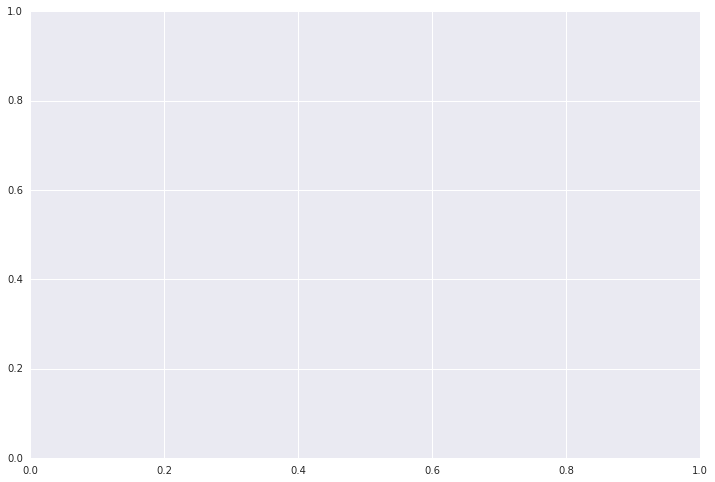